In [1]:
import palantir
import scanpy as sc
import cellrank as cr

# Plotting
import matplotlib
import matplotlib.pyplot as plt


In [2]:
path = '/home/achmed/ssdmnt/cache/external_datasets/'

In [3]:
ad = sc.read(path + 'external_IM_epithelium_proc.h5ad')

/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
str(ad)

"AnnData object with n_obs × n_vars = 45881 × 33145\n    obs: 'Sample', 'Tissue_in_paper', 'Batch', 'Sample_Barcode', 'sum', 'detected', 'Study', 'Patient_type', 'Patient_status', 'MT.prop', 'sizeFactor', 'Global_cluster_selected', 'Celltypes_global', 'Tissuetypes_global', 'Detailed_Cell_Type', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'donor_id', 'suspension_type', 'development_stage_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'\n    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'mean', 'std'\n    uns: 'Detailed_Cell_Type_colors', 'Patient_status_colors', 'X_name', 'citation', 'pca', 'schema_reference', 'schema_version', 'tissue_co

In [5]:
sc.pp.subsample(ad, fraction = 0.75)

/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
str(ad)

"AnnData object with n_obs × n_vars = 34410 × 33145\n    obs: 'Sample', 'Tissue_in_paper', 'Batch', 'Sample_Barcode', 'sum', 'detected', 'Study', 'Patient_type', 'Patient_status', 'MT.prop', 'sizeFactor', 'Global_cluster_selected', 'Celltypes_global', 'Tissuetypes_global', 'Detailed_Cell_Type', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'donor_id', 'suspension_type', 'development_stage_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'\n    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'mean', 'std'\n    uns: 'Detailed_Cell_Type_colors', 'Patient_status_colors', 'X_name', 'citation', 'pca', 'schema_reference', 'schema_version', 'tissue_co

Here, we select which UMAP we want. Check the UMAPs produced in the previous script.

In [7]:
ad.obsm['X_umap'] = ad.obsm['X_umap_MinDist_0.3_N_Neighbors_15'].copy()

Setting up the environment

In [8]:
# Execution start begin with timing
sc.settings.verbosity = 3
sc.set_figure_params(dpi = 150, frameon = 0)

global_res = 0.5

In [9]:
palantir.preprocess.log_transform(ad)

In [10]:
sc.pp.highly_variable_genes(ad, n_top_genes = 1500, flavor = "seurat")

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [11]:
sc.pp.neighbors(ad, n_neighbors = 30, use_rep = 'X_pca_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)


In [12]:
dm_res = palantir.utils.run_diffusion_maps(ad, n_components = 50)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [13]:
ms_data = palantir.utils.determine_multiscale_space(ad)

In [14]:
palantir.utils.run_magic_imputation(ad)

matrix([[0.        , 0.        , 0.        , ..., 0.35042977, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.01826768, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.24051342, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.16433152, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.19297462, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.15182567, 0.        ,
         0.        ]])

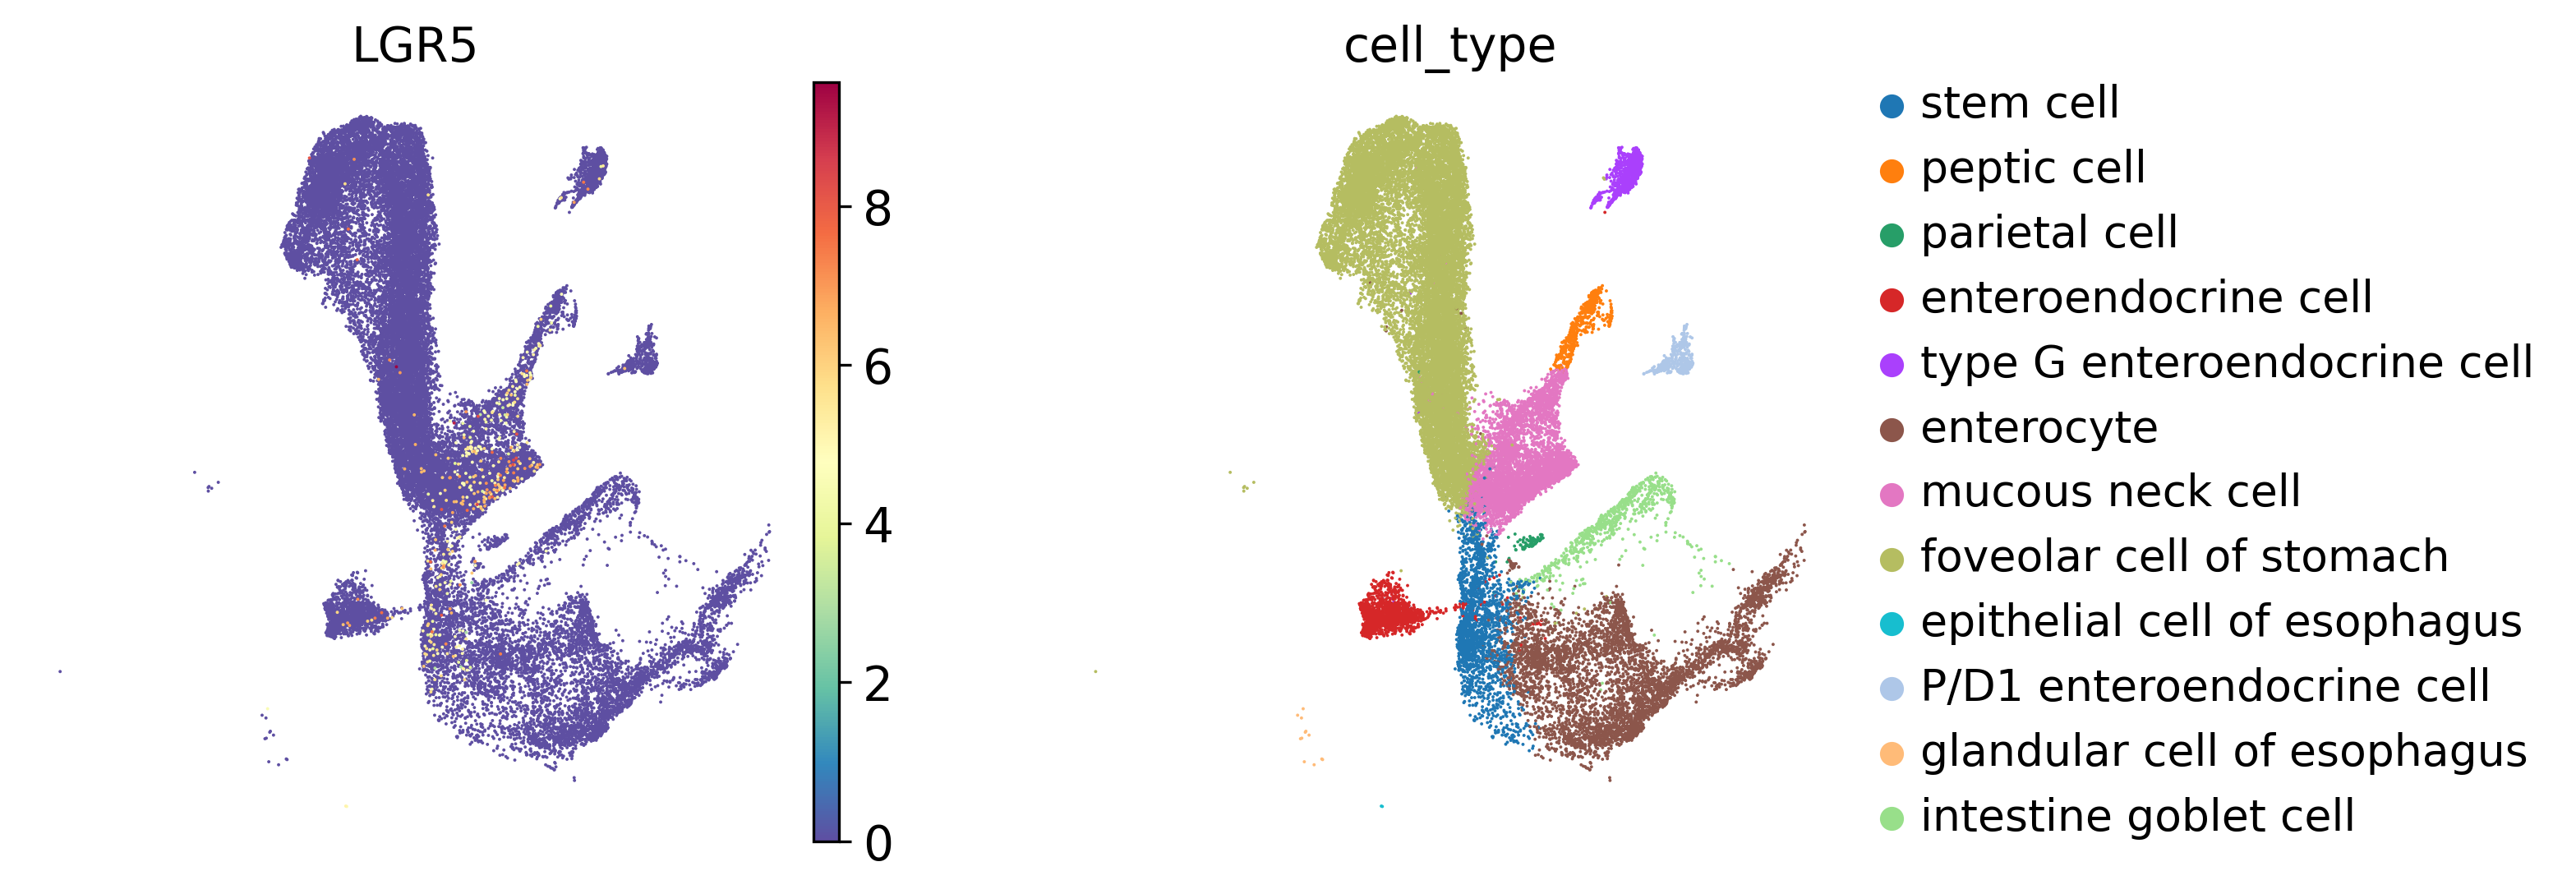

In [15]:
sc.pl.umap(ad, color = ['LGR5', 'cell_type'], use_raw = False)

In [16]:
ad_st_filt = ad[ad.obs['cell_type'] == 'stem cell']

  (0, 0)	6.719134956462302
  (1, 0)	6.681757927413017
  (2, 0)	7.071557515052956
  (3, 0)	7.450909699115675
  (4, 0)	8.073415486879425
  (5, 0)	6.87864731913376
  (6, 0)	7.211968529744572
  (7, 0)	7.774297911373608
  (8, 0)	7.101270149343273
  (9, 0)	7.086297597960369
  (10, 0)	7.620555494845718


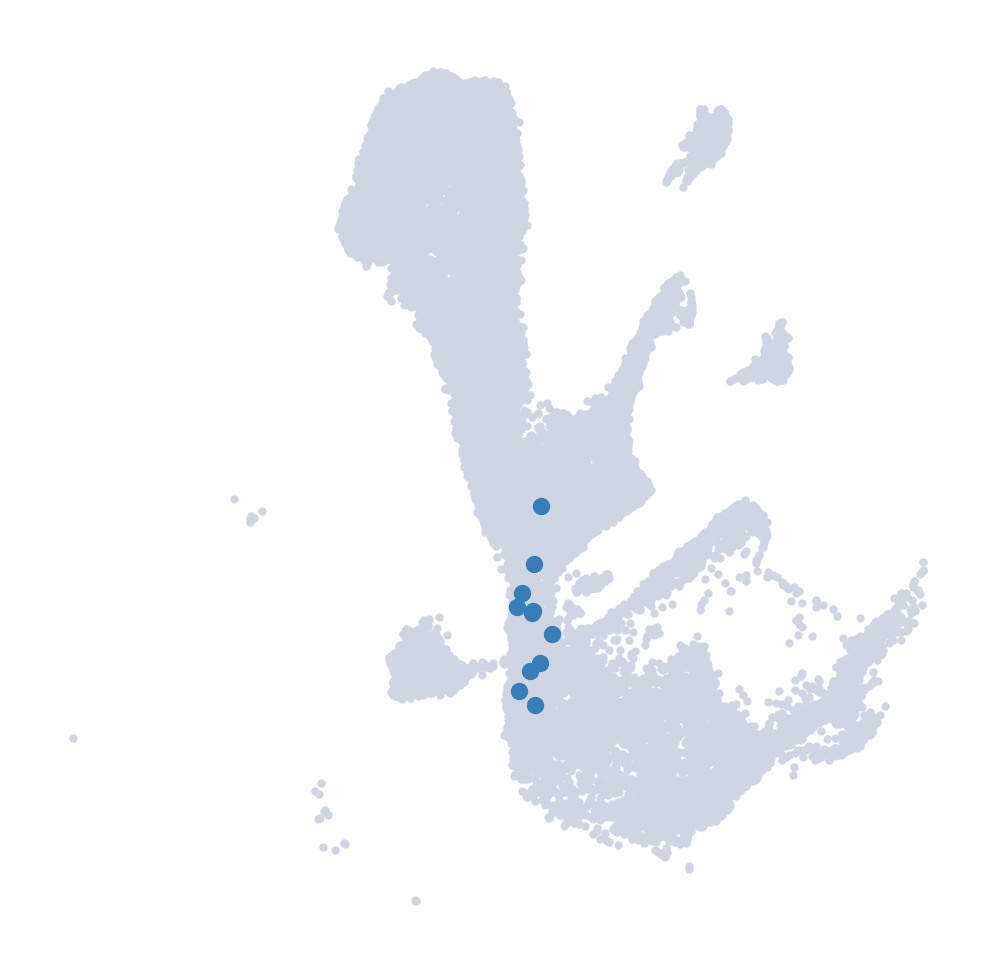

In [17]:
starting_cell = ad_st_filt[ad_st_filt[:, 'LGR5'].X > 6.65]
print(starting_cell[:, 'LGR5'].X)
start_cell = starting_cell.obs_names
palantir.plot.highlight_cells_on_umap(ad, start_cell)
plt.show()

  (0, 0)	6.719134956462302
  (1, 0)	6.681757927413017
  (2, 0)	6.87864731913376


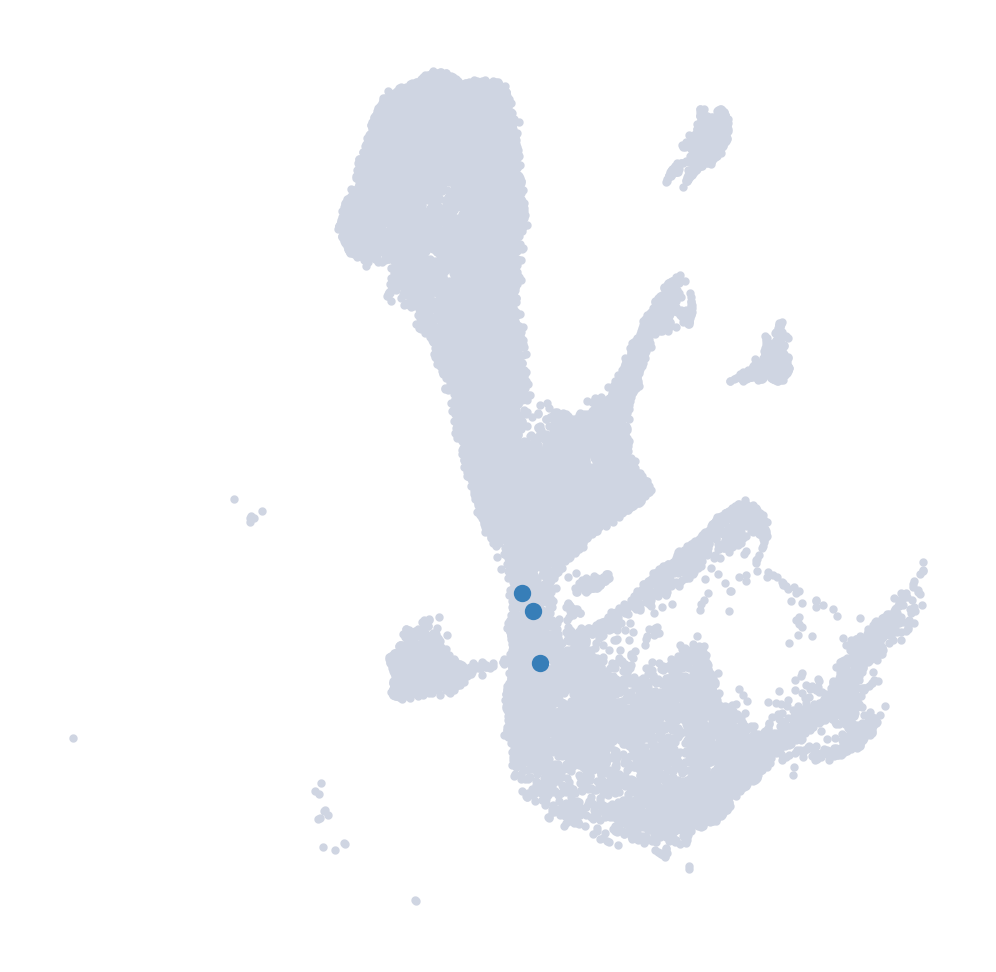

In [18]:
starting_cell = starting_cell[starting_cell[:, 'LGR5'].X < 7]
print(starting_cell[:, 'LGR5'].X)
start_cell = starting_cell.obs_names
palantir.plot.highlight_cells_on_umap(ad, start_cell)
plt.show()

Show terminal states here when defined

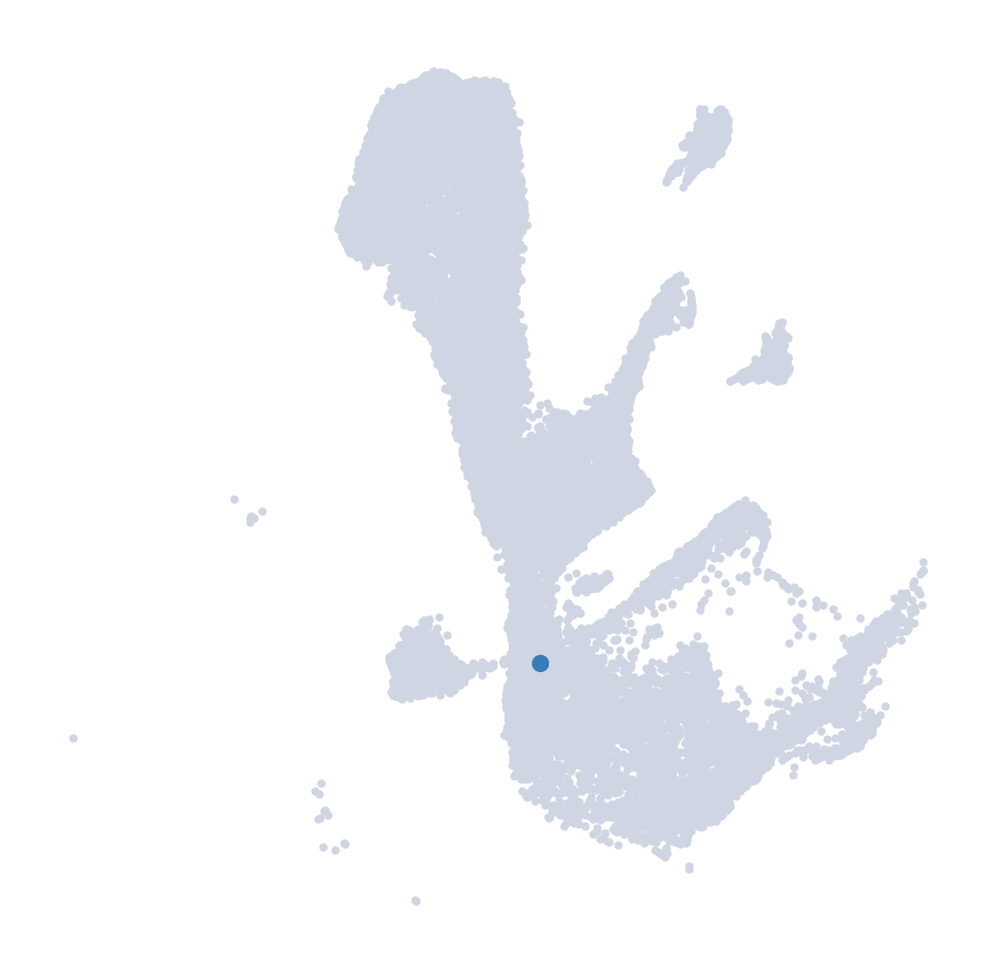

In [19]:
palantir.plot.highlight_cells_on_umap(ad, [start_cell[2]])
plt.show()

In [20]:
pr_res = palantir.core.run_palantir(data = ad, early_cell = start_cell[0], num_waypoints = 500, use_early_cell_as_start = 0, knn = 100, scale_components = 1)

Sampling and flocking waypoints...
Time for determining waypoints: 0.00733335018157959 minutes
Determining pseudotime...
Shortest path distances using 100-nearest neighbor graph...
Time for shortest paths: 0.910360058148702 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9850
Correlation at iteration 2: 0.9999
Correlation at iteration 3: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/palantir/plot.py:564: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


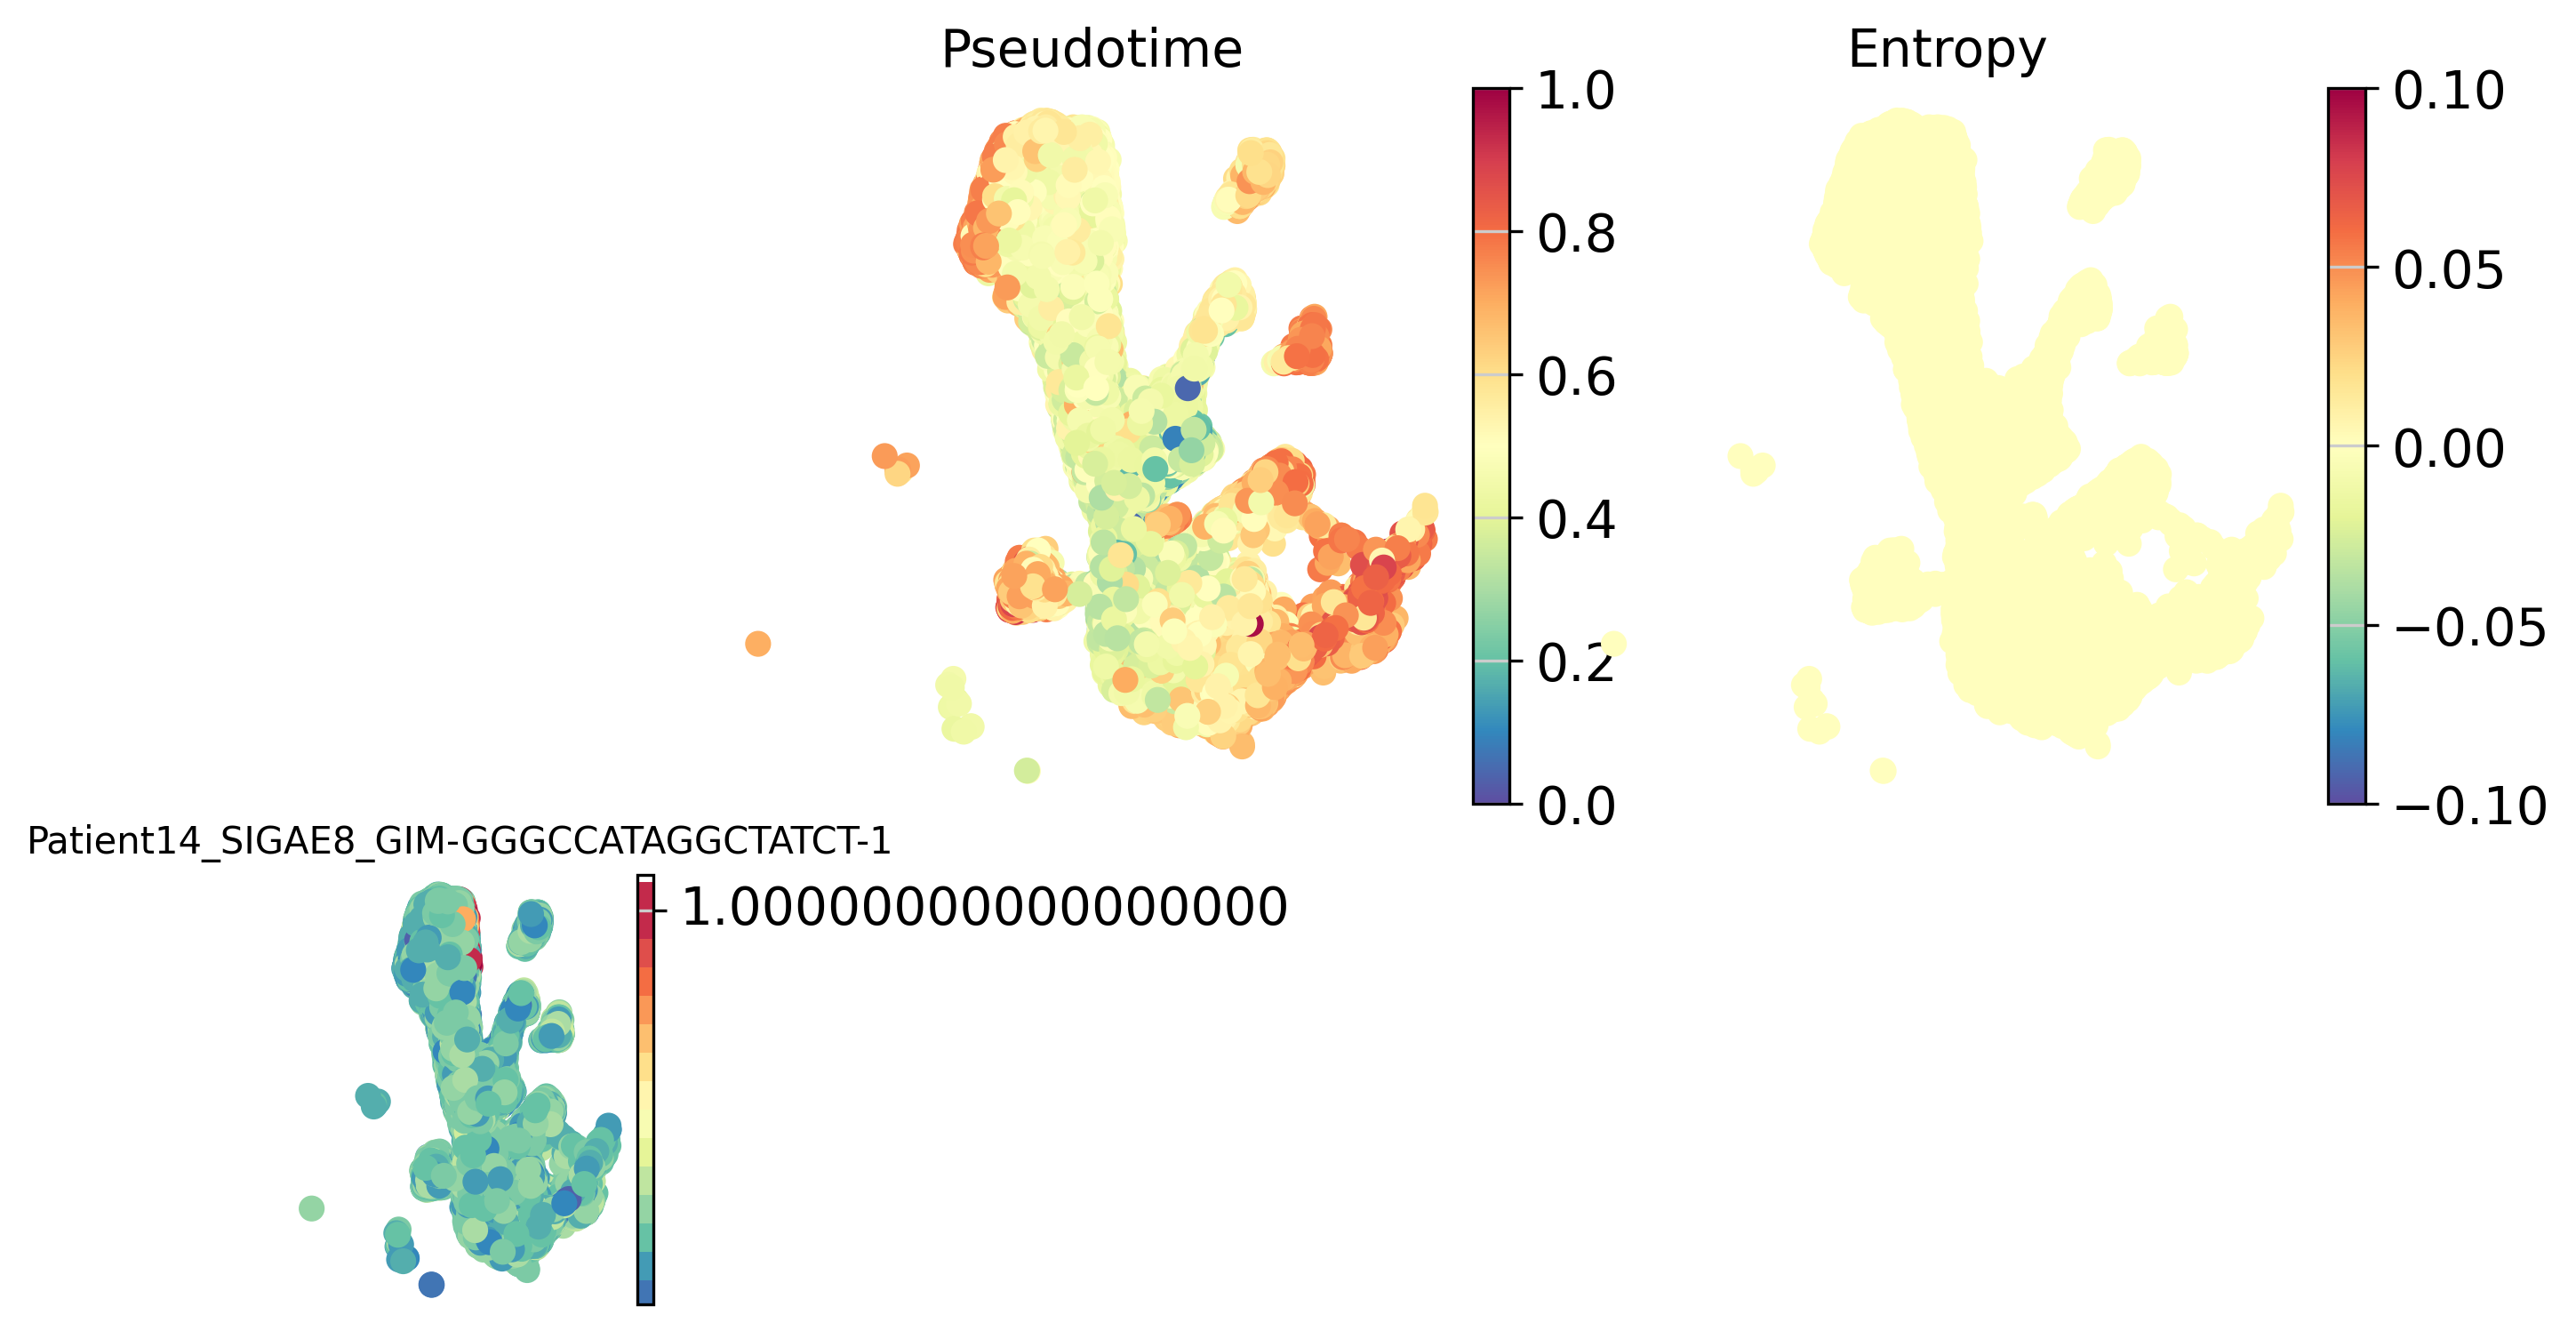

In [21]:
palantir.plot.plot_palantir_results(ad)
plt.show()

In [22]:
from cellrank.kernels import PseudotimeKernel

pk = PseudotimeKernel(ad, time_key="palantir_pseudotime")

In [23]:
pk.compute_transition_matrix()

100%|██████████| 34410/34410 [00:05<00:00, 6432.46cell/s]


PseudotimeKernel[n=34410, dnorm=False, scheme='hard', frac_to_keep=0.3]

In [ ]:
pk.plot_random_walks(
    n_sims = 300,
    linewidth = 0.5,
    start_ixs = {"cell_type": "stem cell"},
    basis = "umap",
    size = 15
)

In [24]:
from cellrank.estimators import GPCCA

g = GPCCA(pk)
print(g)

GPCCA[kernel=PseudotimeKernel[n=34410], initial_states=None, terminal_states=None]


/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


### Bit of memory cleanup

In [25]:
del pk
#del ad
del pr_res
del ad_st_filt
del dm_res
del ms_data

In [26]:
g.fit(n_states = 15, cluster_key = "cell_type")

GPCCA[kernel=PseudotimeKernel[n=34410], initial_states=None, terminal_states=None]

/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


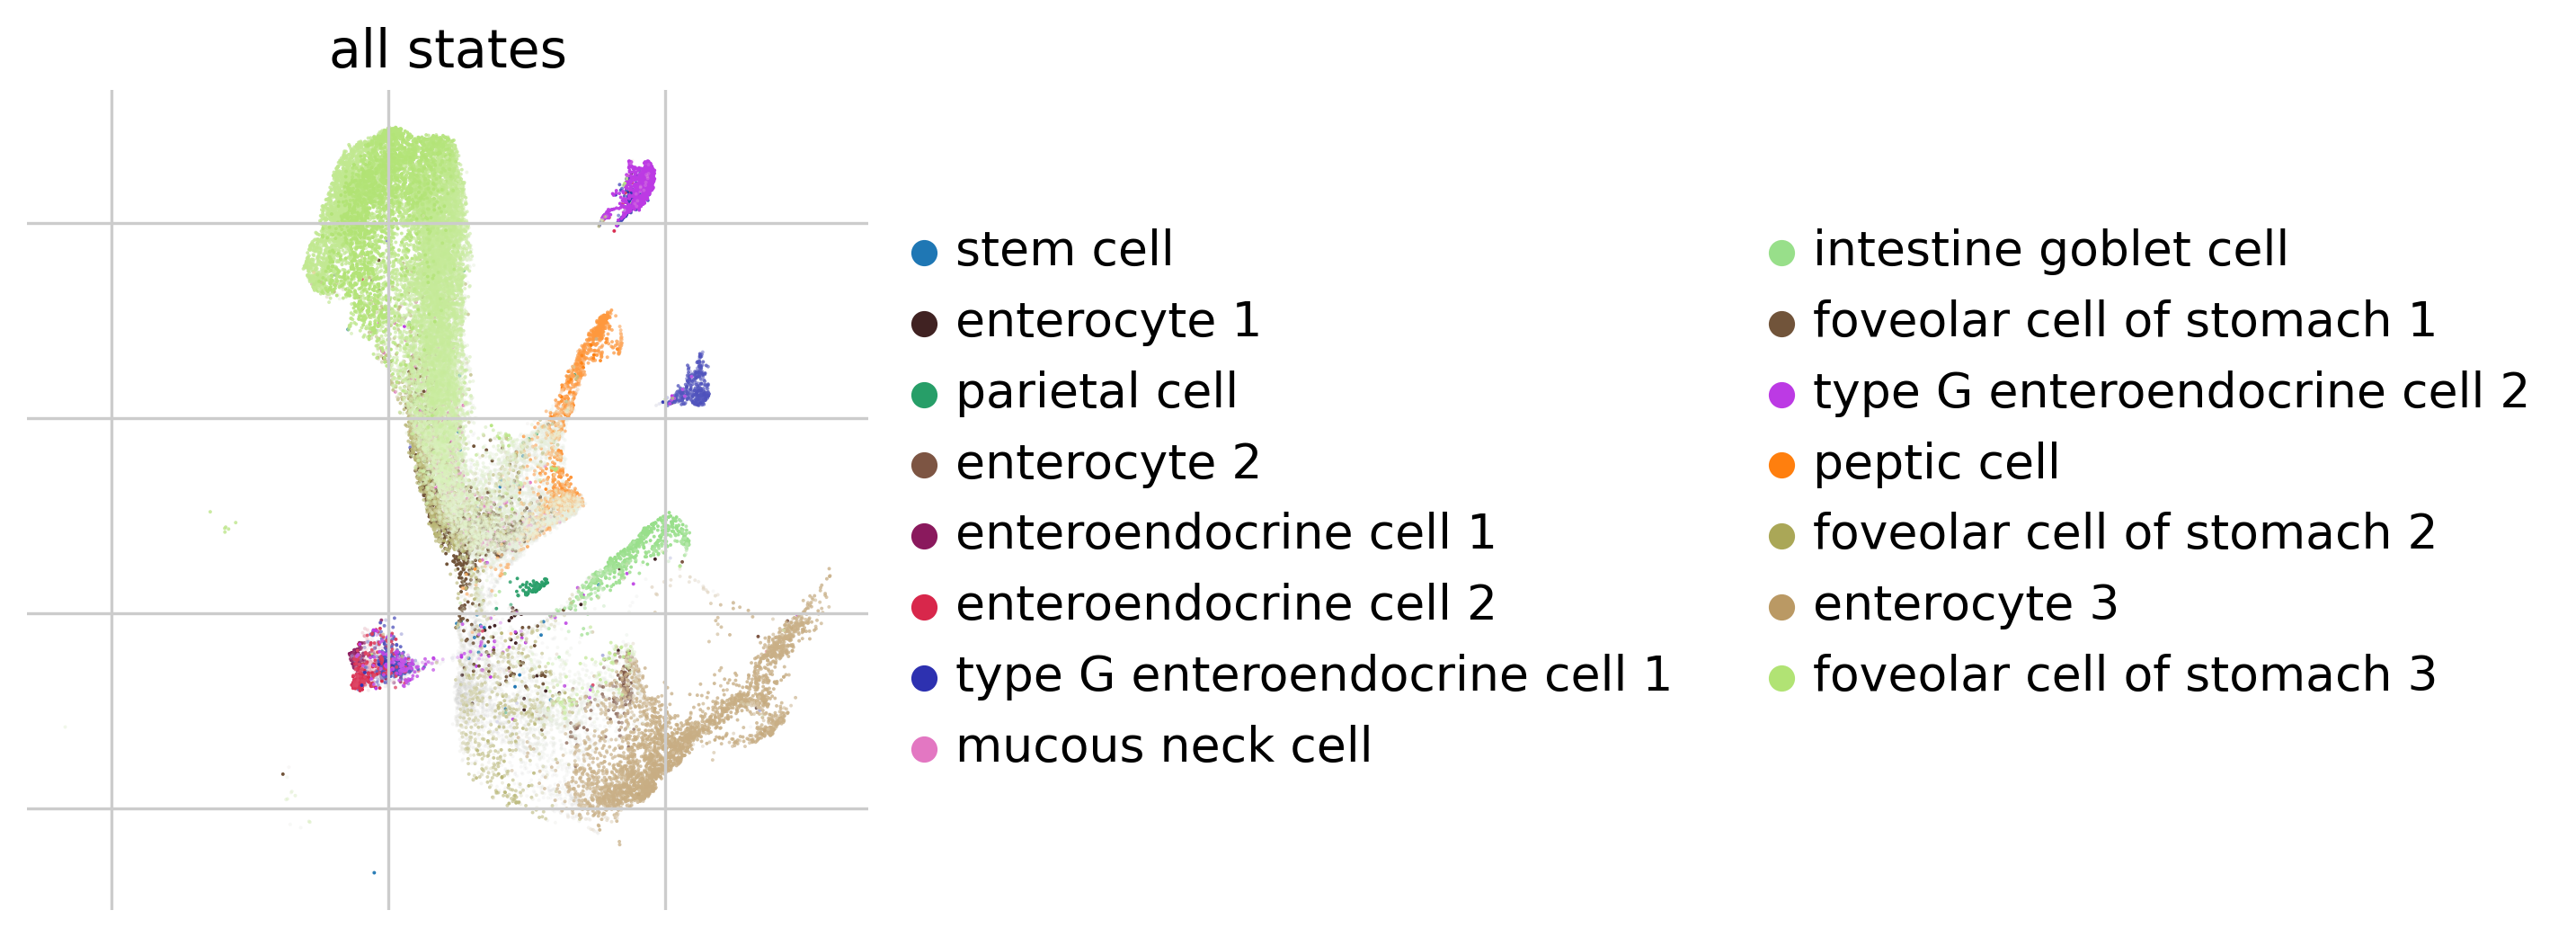

In [27]:
g.plot_macrostates(which = "all", legend_loc = 'right margin', discrete = False)

In [28]:
g.predict_terminal_states(method = "eigengap", n_states = 15)

GPCCA[kernel=PseudotimeKernel[n=34410], initial_states=None, terminal_states=['enterocyte_3', 'foveolar cell of stomach_1', 'stem cell', 'type G enteroendocrine cell_2']]

/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


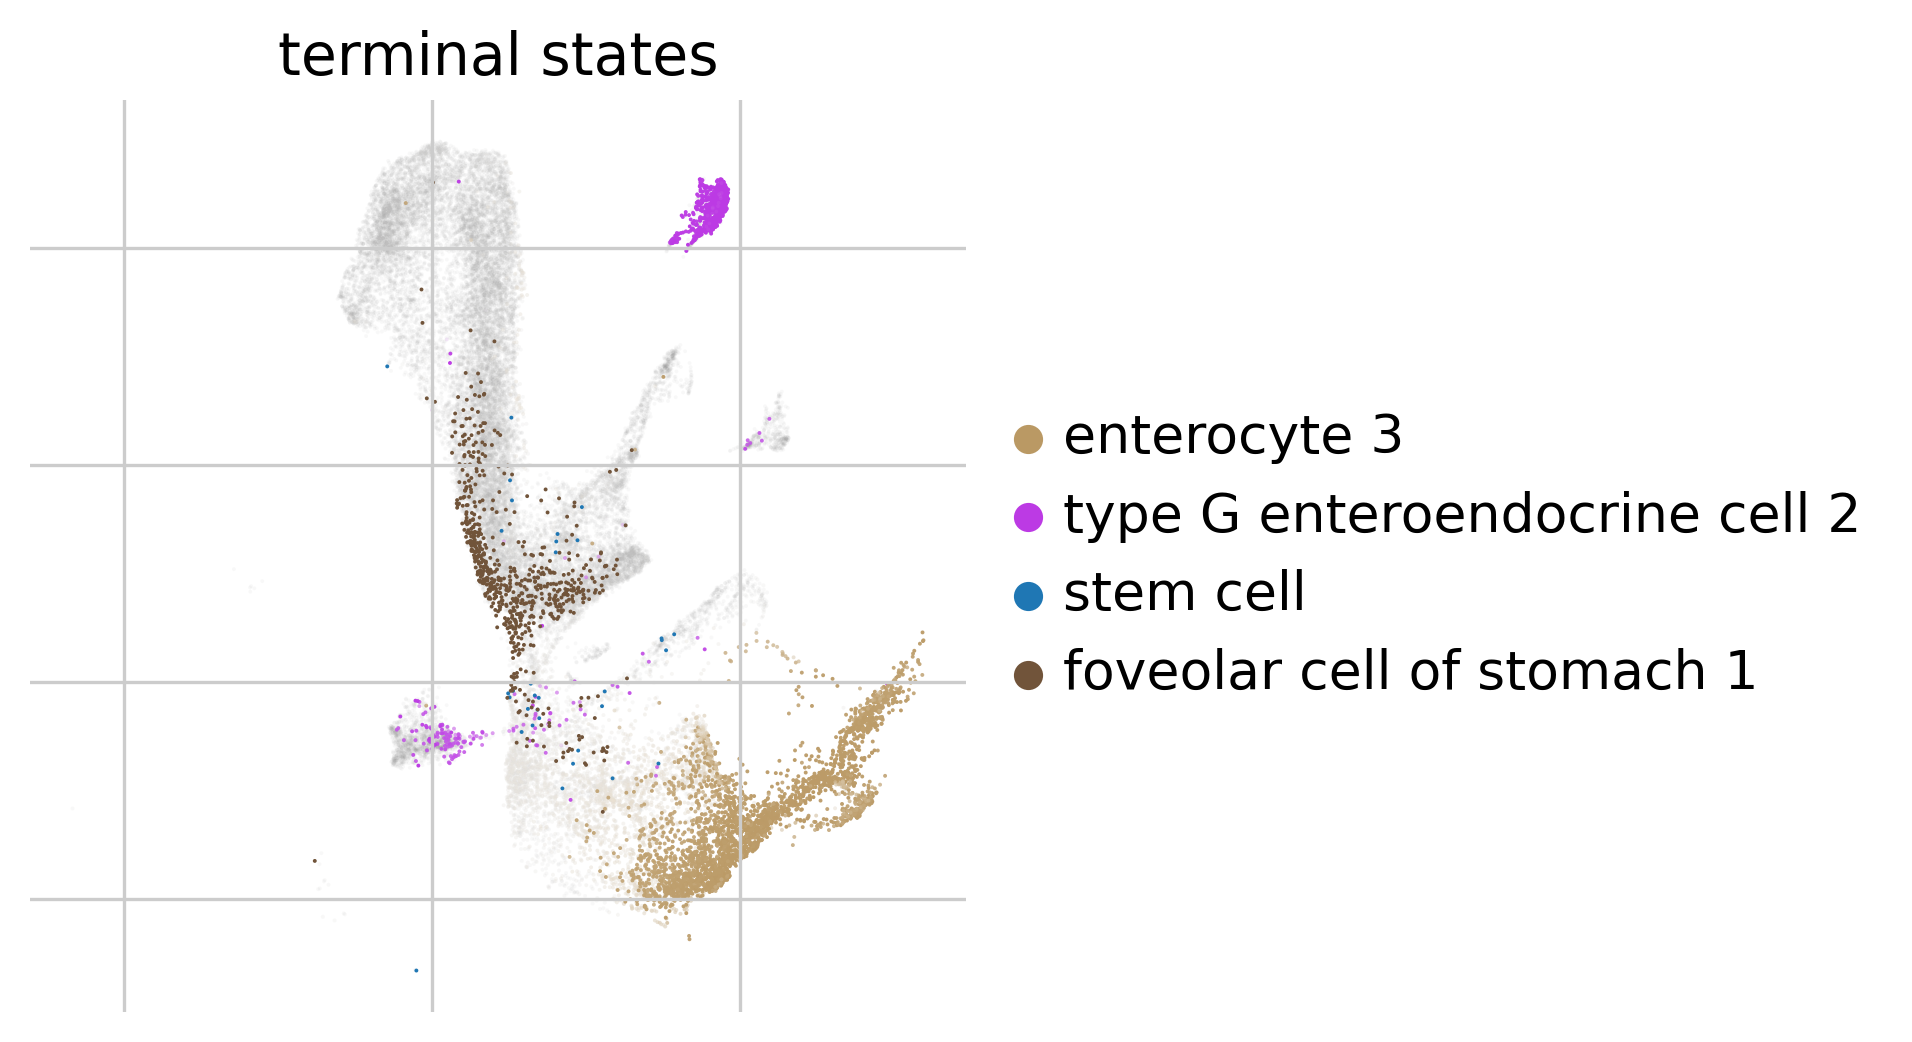

In [29]:
g.plot_macrostates(which = "terminal", legend_loc = 'right margin', discrete = False)

In [30]:
g.predict_initial_states()

GPCCA[kernel=PseudotimeKernel[n=34410], initial_states=['mucous neck cell'], terminal_states=['enterocyte_3', 'foveolar cell of stomach_1', 'stem cell', 'type G enteroendocrine cell_2']]

/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/utils.py:1391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/utils.py:1392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


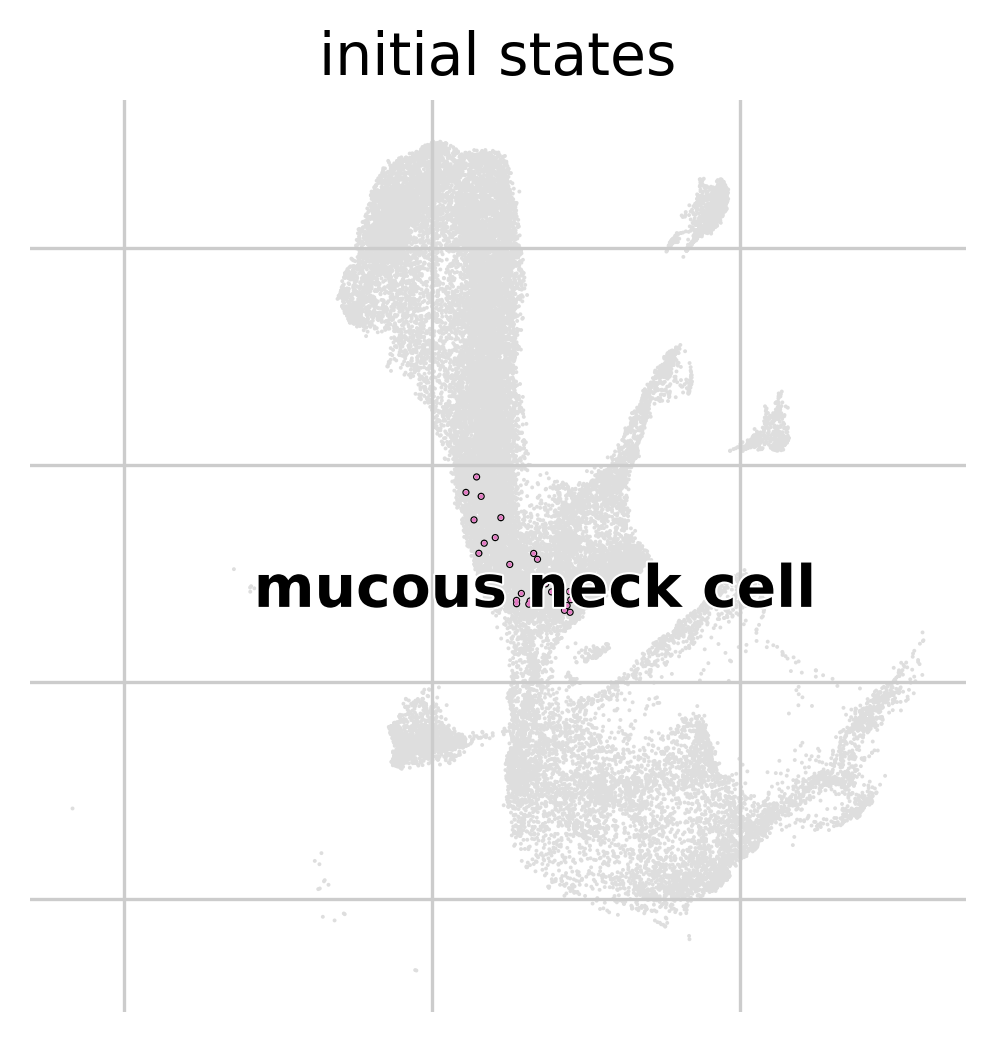

In [31]:
g.plot_macrostates(which = "initial")

In [32]:
g.compute_fate_probabilities()

100%|██████████| 4/4 [00:01<00:00,  2.67/s]


/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/achmed/ssdmnt/python_venv/jupyter_venv/lib/python3.12/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


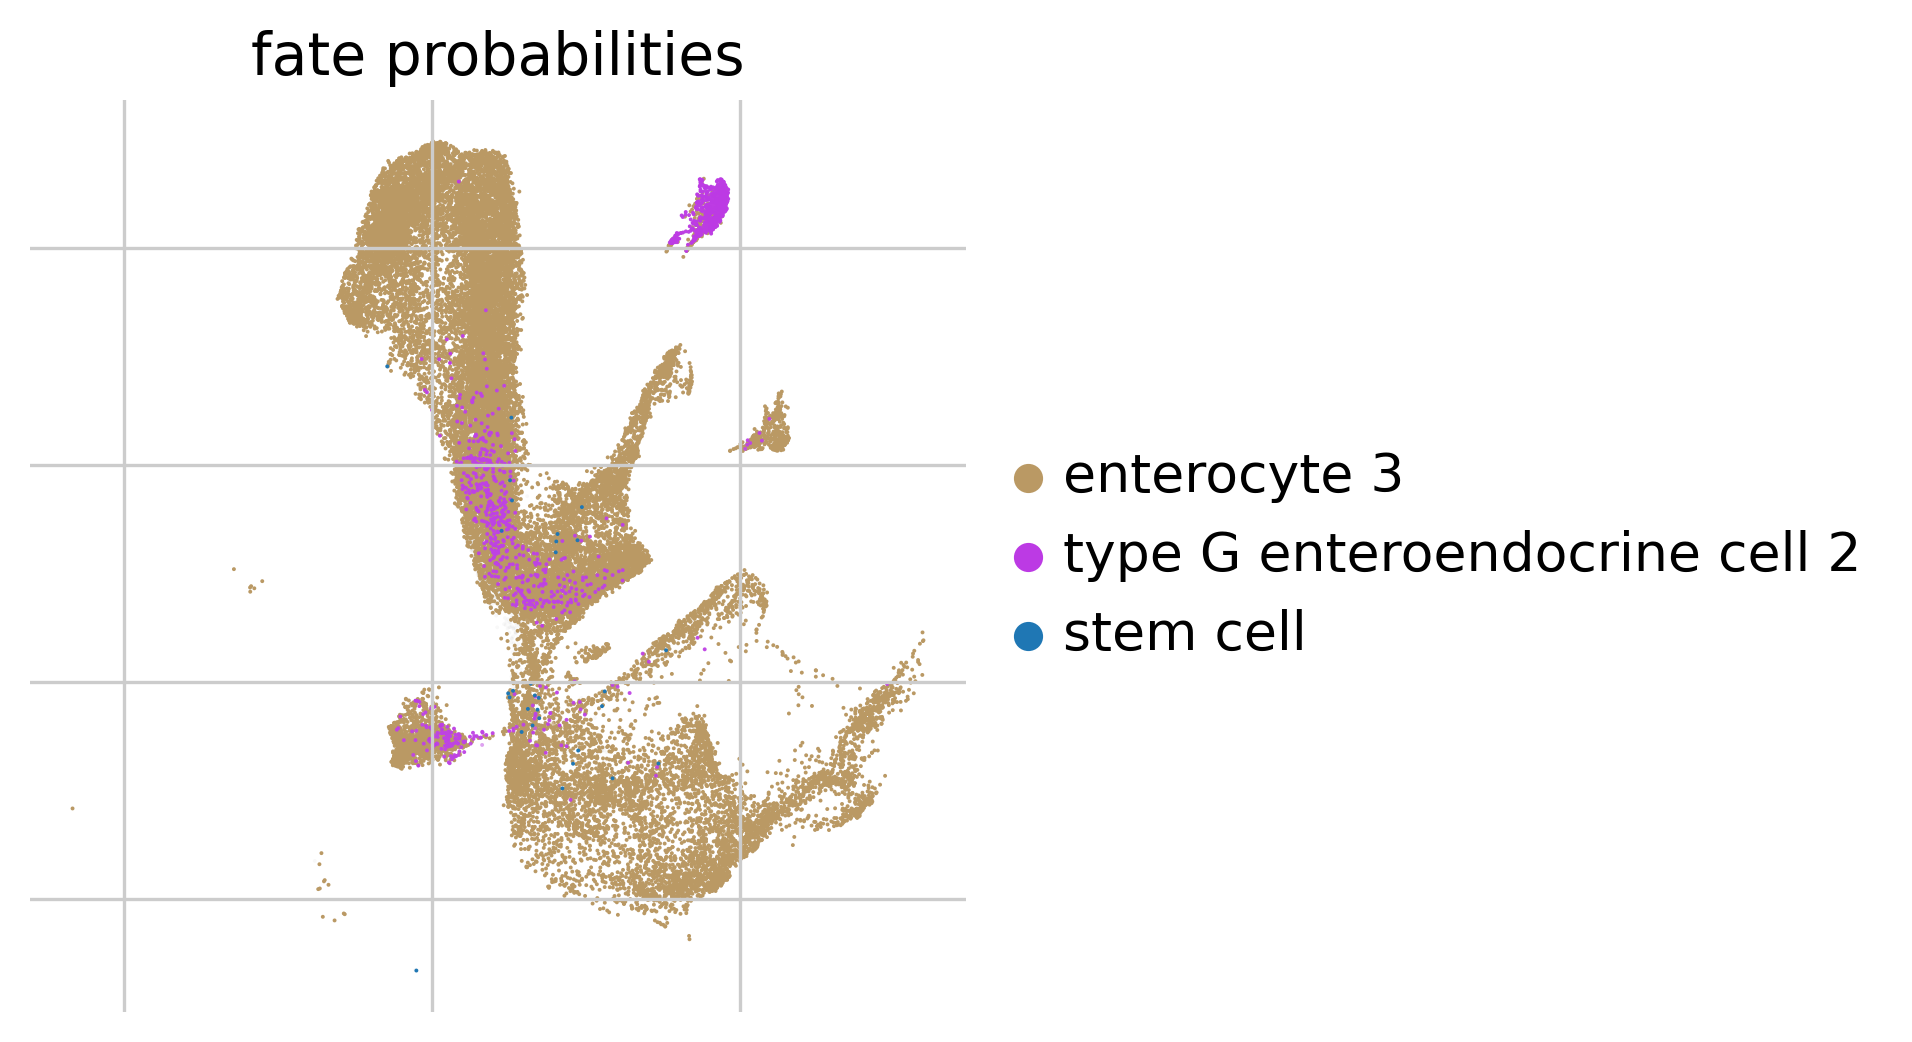

In [33]:
g.plot_fate_probabilities(legend_loc="right")

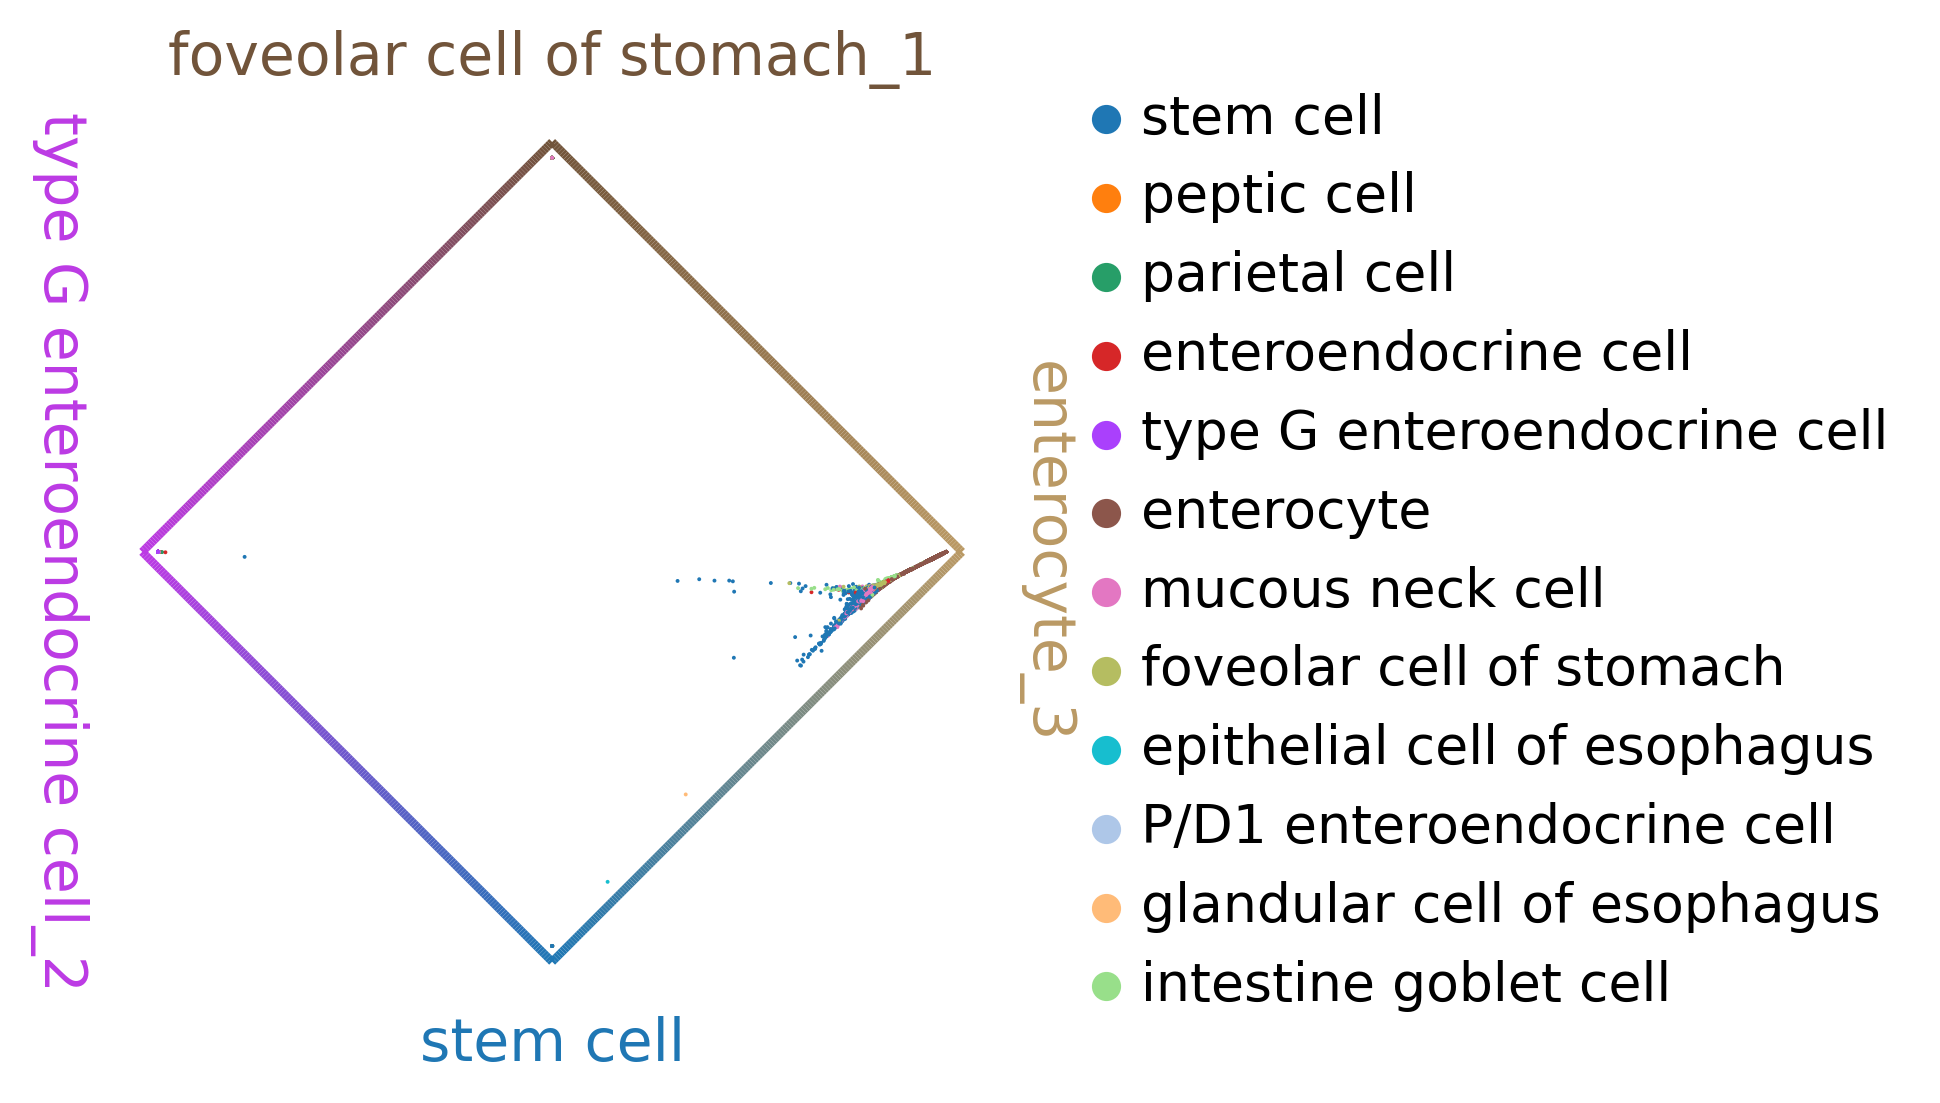

In [35]:
cr.pl.circular_projection(ad, keys="cell_type", legend_loc="right", title = '')